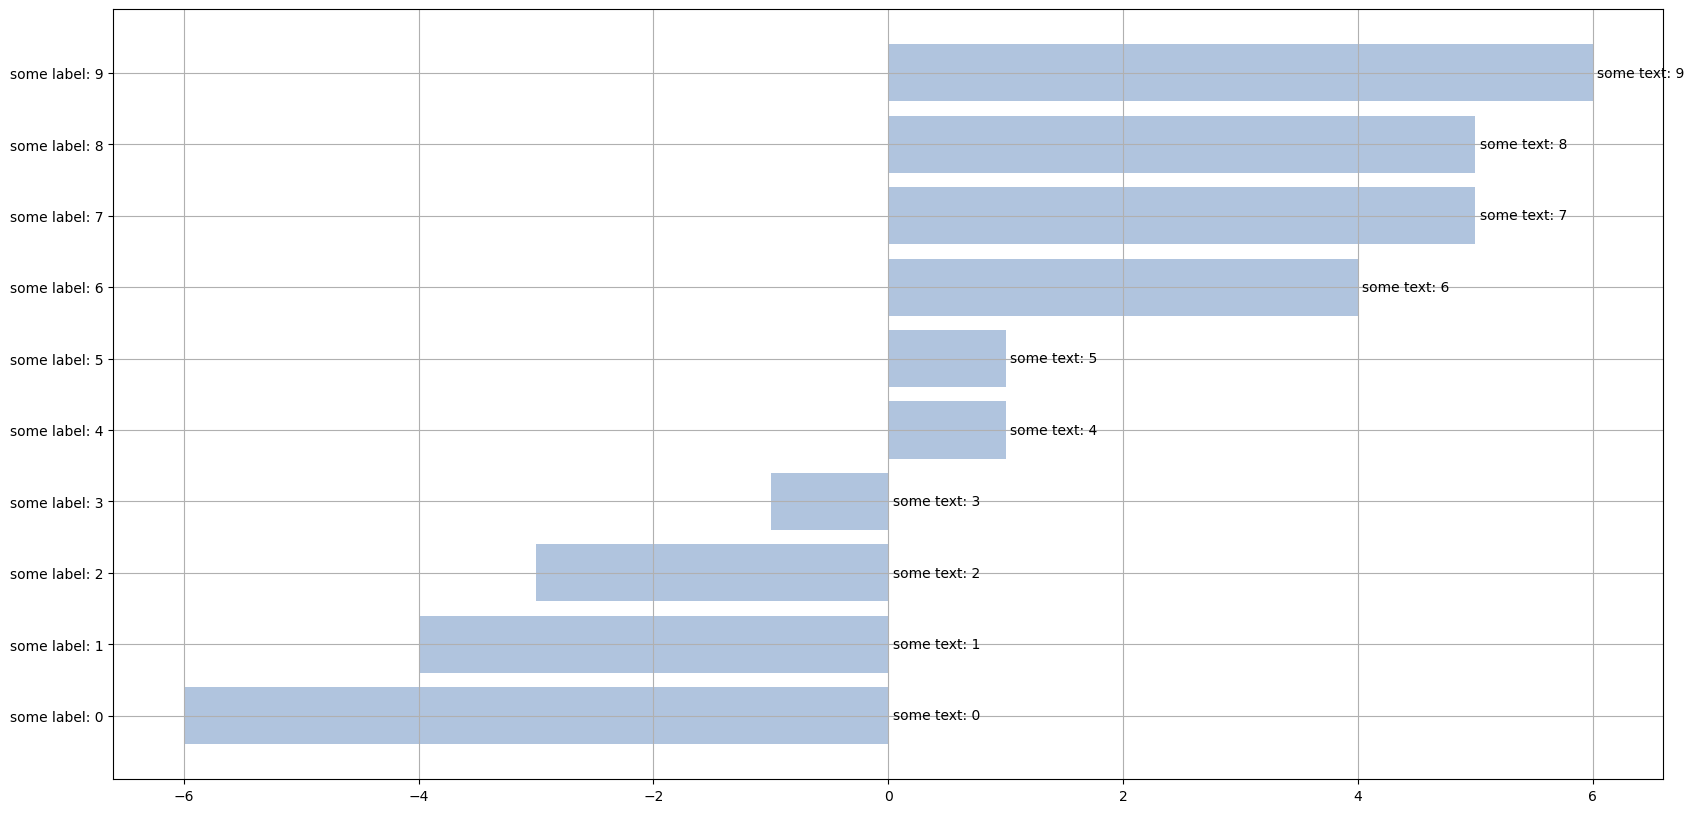

In [1]:
# Упражнение 1

import matplotlib.pyplot as plt
import numpy as np

def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
     plt.rcdefaults()
     fig, ax = plt.subplots(figsize=figsize)    
     rects = ax.barh(yticks_labels, bars_length, color='lightsteelblue')    
     for i, rect in enumerate(rects):              
         x = max(0, rect.get_x() + rect.get_width())        
         y = rect.get_y() + rect.get_height()/2
         ax.annotate(labels[i],
                     xy = (x, y),
                     xytext = (3, 0), 
                     textcoords = "offset points",
                     ha='left', 
                     va='center')                             
     plt.grid(True)     
     plt.show()


# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)


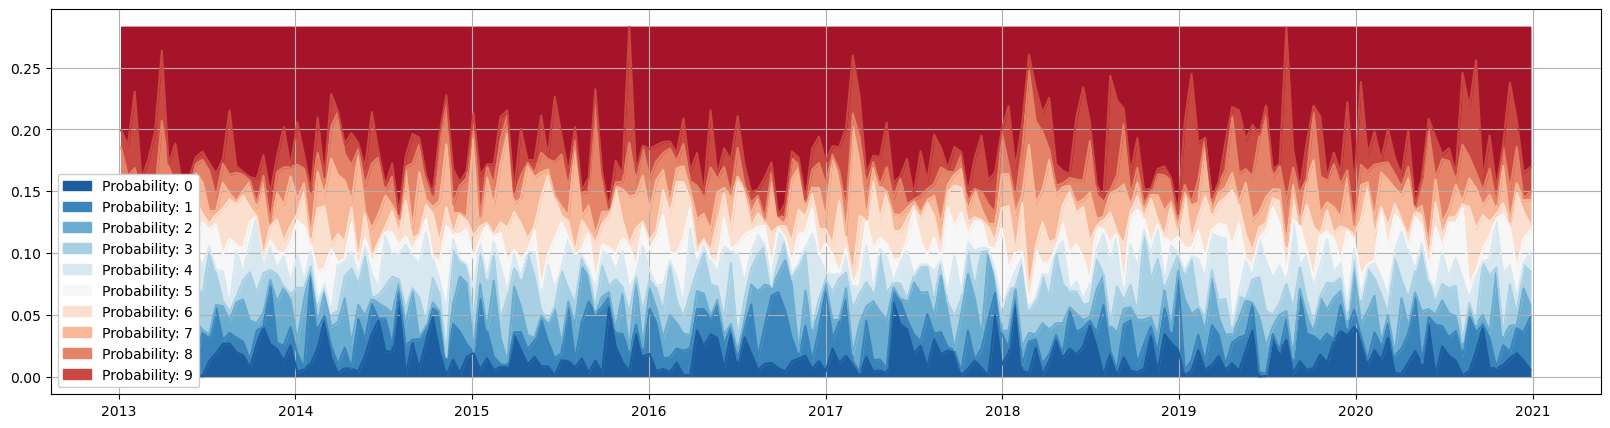

In [2]:
# Упражнение 2


# Нестандартная "легенда"
# https://matplotlib.org/2.0.2/users/legend_guide.html

# Градиент и заливка
# https://coderoad.ru/61041434/%D0%9A%D0%B0%D0%BA-%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D1%8C-%D0%BF%D0%B0%D0%BB%D0%B8%D1%82%D1%80%D1%83-python-%D0%B2-%D0%BC%D0%B0%D1%81%D1%81%D0%B8%D0%B2-%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2-%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE-%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%B0

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd


def plot_time_probabilities(probabilities_in_time, figsize):        
    color_map = cm.get_cmap('RdBu_r', len(probabilities_in_time.columns)+3)  # градиент
    
    # не берем крайние цвета они слишком темные, и порядок от синего к красно-бордовому
    colors = list([ color_map(i) for i in range(color_map.N) ])[1:-1] 
    
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=figsize)     
    lines = plt.plot(probabilities_in_time)          
    for line, color in zip(lines,colors): 
        line.set_color(color)
        
    # закрашивание пространства между низом и первым графикам
    plt.fill_between(probabilities_in_time.index,
                     np.zeros(len(probabilities_in_time.index)),
                     probabilities_in_time[0],
                     color= colors[0])
                   
    # закрашивание пространства между графиками
    last_index = len(probabilities_in_time.columns)-1                   
    for i in range(last_index):
        plt.fill_between(probabilities_in_time.index,
                         probabilities_in_time[i],
                         probabilities_in_time[i+1],
                         color= colors[i+1])             
 
    # закрашивание пространства между верхом и последним графиком
    max_value = max([ probabilities_in_time[i].max() for i in probabilities_in_time])
    plt.fill_between(probabilities_in_time.index,
                      probabilities_in_time[last_index],
                      np.full(len(probabilities_in_time.index),max_value),
                      color= colors[last_index+1],
                      alpha= 1)
                 
    # патч-перерисовка маркеров в легенде (в виде закрашеных прямоугольников)                 
    handles = [ mpatches.Patch(color=color, label=f'Probability: {column}') \
                for color, column \
                in zip(colors, probabilities_in_time.columns)]                     
    
    plt.legend(handles=handles, loc='lower left', framealpha= 1)     
    plt.grid(True)     
    plt.show()


# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)

""" 
  Что бы получилась диаграмма именно такая как в задании 
  значения следующего графика должны быть больше сответствующих значений предыдущего графика
"""
for column in range(probabilities_in_time.shape[1]):
   probabilities_in_time[:, column] = sorted(probabilities_in_time[:, column])

probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)



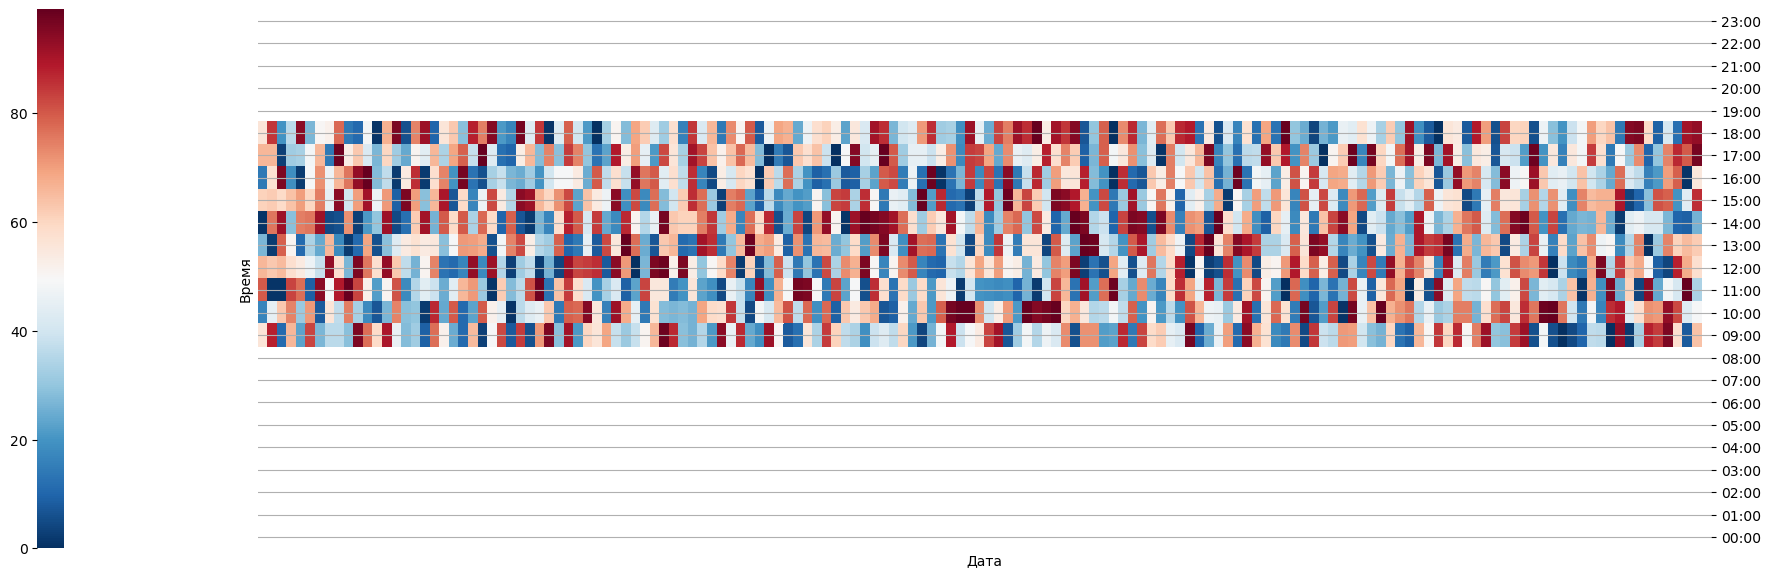

In [3]:
# Упражнение 3


# Тепловая карта
# https://medium.com/nuances-of-programming/4-%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%8B%D0%B5-%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85-%D0%B2-python-%D1%81-%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E-%D0%BA%D0%BE%D0%B4%D0%B0-ca58253fa1a3

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime


def plot_intraday_ts(intraday_ts, figsize):

    first_date = intraday_ts.index[0].date()
    last_date =  intraday_ts.index[-1].date()
    dates = [d.date() for d in pd.date_range(first_date, last_date, freq='D')]                                                          
    times = [datetime.time(hour=h) for h in range(24)][::-1]
    
    data = np.full((24,len(dates)), np.nan)
    data_df = pd.DataFrame(data, index= times, columns= dates)   
    for dt in intraday_ts.index:
       data_df.loc[dt.time()][dt.date()] = intraday_ts[dt]
     
    plt.rcdefaults()
       
    fig, ax = plt.subplots(figsize=figsize)     
    ax.yaxis.tick_right()
     
    
    heatmap_plot = sns.heatmap(data_df,
                               cmap= 'RdBu_r',
                               cbar_kws = dict(use_gridspec=False, location="left"),
                               ax=ax)
    
    
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %d'))
    ax.xaxis.set_minor_locator(mdates.DayLocator())        
    plt.xticks(rotation=45)
    
    """ Cледующий код по чему-то не работает для оси y"""
    #ax.yaxis.set_major_locator(mdates.AutoDateLocator())
    #ax.yaxis.set_minor_locator(mdates.HourLocator(interval=1))
    #ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    """ Поэтому явно устанавливаем метки """            
    ticklabels = [ t.strftime('%H:%M') for t in times ]
    ax.set_yticklabels( ticklabels, rotation='horizontal' )
    
    plt.xlabel('Дата')    
    plt.ylabel('Время') 
    ax.grid(True)    
    
    fig.autofmt_xdate()        
    plt.show()

# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)

plot_intraday_ts(intraday_ts, figsize)





